# ALE plot interaction with pyALE

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will create 2-feature ALE plots with the open-source Python library [pyALE](https://pypi.org/project/PyALE/) and some manual help.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from PyALE import ale

## Load data

In [2]:
# we'll just use the numerical variables to speed up the demo

variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
             'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'MoSold', 'YrSold', 'SalePrice']

# load dataset

data = pd.read_csv('../houseprice.csv', usecols=variables)

In [3]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

## Random Forest

In [4]:
# train model

rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=3,
    random_state=3,
).fit(X_train, y_train)

In [5]:
# R2 in train set

rf.score(X_train, y_train)

0.8111905087278761

In [6]:
# R2 in test set

rf.score(X_test, y_test)

0.7848537001494764

The model explains > 75% of the variability in the target.

## Feature importance

Let's determine the feature importance derived from the model.

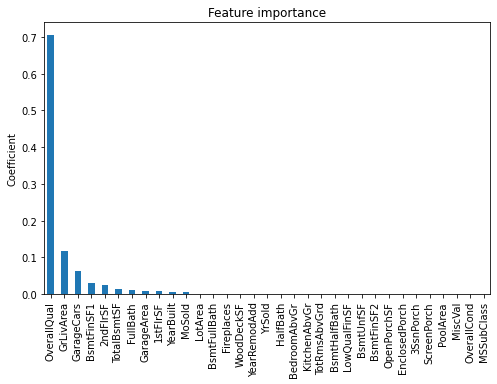

In [7]:
# put coefficients in a series

s = pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_,
)

# plot coefficients
s.sort_values(ascending=False).plot.bar(figsize=(8, 5))
plt.title("Feature importance")
plt.ylabel("Coefficient")
plt.show()

## 1-D ALE plot

PyALE._ALE_generic:INFO: Discrete feature detected.


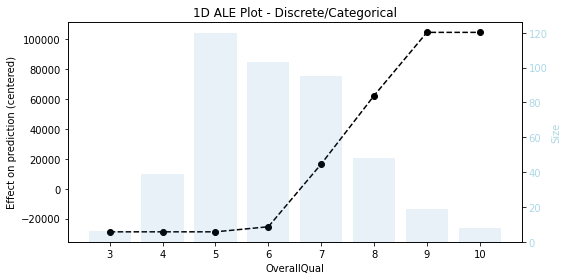

In [8]:
# 1D - continuous - no Confidence interval
ale_eff = ale(
    X=X_test, model=rf, feature=["OverallQual"], grid_size=10, include_CI=False
)

PyALE._ALE_generic:INFO: Continuous feature detected.


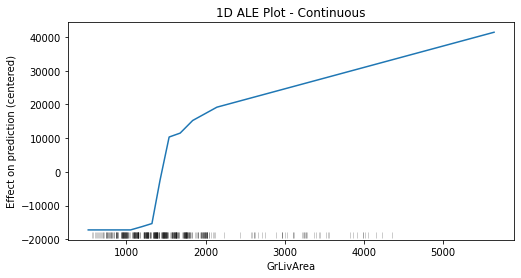

In [9]:
# Let's examine a less important feature

ale_eff = ale(
    X=X_test, model=rf, feature=["GrLivArea"], grid_size=10, include_CI=False,
)

PyALE._ALE_generic:INFO: Continuous feature detected.


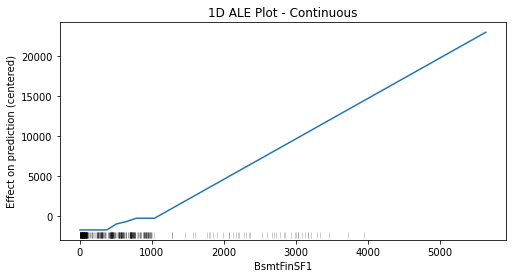

In [10]:
# 1D - continuous - no Confidence interval
ale_eff = ale(
    X=X_test, model=rf, feature=["BsmtFinSF1"], grid_size=10, include_CI=False
)

## 2-D ALE plot

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:143: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0 = eff_df - eff_df.groupby(level=1).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:148: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0.groupby(level=0).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:160: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_1 = eff_df - eff_df.groupby(level=0).shift(periods=1, axis=0, fill_value=0)


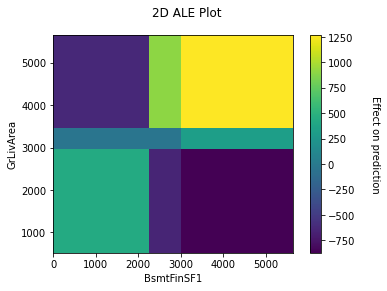

In [11]:
# the out of the box function does not work :/

## 2D - continuous

ale_eff = ale(
    X=X_test, 
    model=rf,
    feature=["GrLivArea", "BsmtFinSF1"], 
    grid_size=20,
)

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:143: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0 = eff_df - eff_df.groupby(level=1).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:148: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0.groupby(level=0).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:160: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_1 = eff_df - eff_df.groupby(level=0).shift(periods=1, axis=0, fill_value=0)


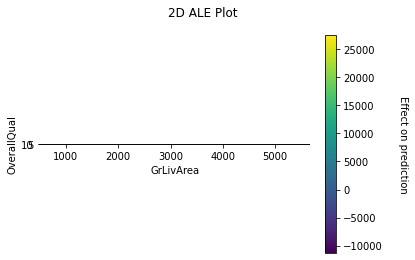

In [12]:
# the out of the box function does not work :/

## 2D - continuous

ale_eff = ale(
    X=X_test, 
    model=rf,
    feature=["OverallQual", "GrLivArea"], 
    grid_size=5,
)

We'll do a work around.

In [13]:
# with this function we obtain the 2nd order effects

from PyALE._src.ALE_2D import aleplot_2D_continuous

In [14]:
eff_grid = aleplot_2D_continuous(X=X_test, model=rf, features=["OverallQual", "GrLivArea"], grid_size=40)

eff_grid

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:143: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0 = eff_df - eff_df.groupby(level=1).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:148: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0.groupby(level=0).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:160: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_1 = eff_df - eff_df.groupby(level=0).shift(periods=1, axis=0, fill_value=0)


GrLivArea,520,778,858,864,907,951,988,1034,1054,1080,...,1787,1838,1920,1960,2076,2144,2259,2515,2668,5642
OverallQual,,,,,,,,,,,,,,,,,,,,,
3,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,...,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769
4,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,...,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769
5,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,...,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769,-448.967769
6,-2457.290517,-2457.290517,-2457.290517,-2457.290517,-2457.290517,-2457.290517,-2457.290517,-2457.290517,-2457.290517,-2457.290517,...,1964.396221,1964.396221,1964.396221,1964.396221,1964.396221,1964.396221,1964.396221,1964.396221,1964.396221,1964.396221
7,4309.428857,4309.428857,4309.428857,4309.428857,4309.428857,4309.428857,4309.428857,4309.428857,4309.428857,4309.428857,...,-2555.207109,6216.243915,8362.516799,5291.857667,5291.857667,5291.857667,5291.857667,9091.443337,9091.443337,9091.443337
8,18771.604213,18771.604213,18771.604213,18771.604213,18771.604213,18771.604213,18771.604213,18771.604213,18771.604213,18771.604213,...,-2677.719054,-915.054851,905.277207,-2165.381925,-3981.666385,-3981.666385,-3981.666385,2034.732730,7790.738772,14558.953096
9,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,...,-5742.876536,-3980.212334,-3980.212334,-8871.203524,-10687.487984,-5605.440616,3361.022716,9377.421831,15133.427873,28669.856520
10,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,15706.446731,...,-5742.876536,-3980.212334,-3980.212334,-8871.203524,-10687.487984,-5605.440616,3361.022716,9377.421831,15133.427873,28669.856520


Text(0.5, 0.98, '2D ALE Plot')

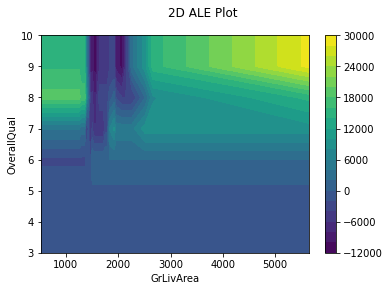

In [15]:
# Now we plot

fig, ax = plt.subplots()

plt.contourf(
    eff_grid.columns, 
    eff_grid.index, 
    eff_grid.values, 
    20, 
)

plt.colorbar()

plt.xlabel(eff_grid.columns.name)
plt.ylabel(eff_grid.index.name)
fig.suptitle("2D ALE Plot")

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:143: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0 = eff_df - eff_df.groupby(level=1).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:148: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_0.groupby(level=0).shift(periods=1, axis=0, fill_value=0)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\PyALE\_src\ALE_2D.py:160: FutureWarning: The 'axis' keyword in SeriesGroupBy.shift is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  eff_df_1 = eff_df - eff_df.groupby(level=0).shift(periods=1, axis=0, fill_value=0)


Text(0.5, 0.98, '2D ALE Plot')

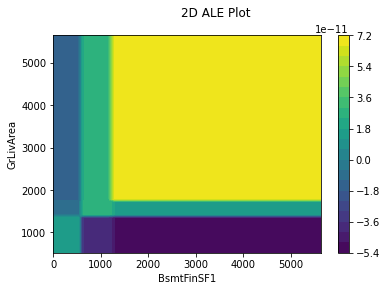

In [16]:
eff_grid = aleplot_2D_continuous(X=X_test, model=rf, features=["GrLivArea", "BsmtFinSF1"], grid_size=40)

# Now we plot

fig, ax = plt.subplots()

plt.contourf(
    eff_grid.columns, 
    eff_grid.index, 
    eff_grid.values, 
    20, 
)

plt.colorbar()

plt.xlabel(eff_grid.columns.name)
plt.ylabel(eff_grid.index.name)
fig.suptitle("2D ALE Plot")